## Testing on real world images

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
sess= tf.Session()
saver= tf.train.import_meta_graph('Model/saved_model.meta')
saver.restore(sess,tf.train.latest_checkpoint('Model/'))

graph = tf.get_default_graph()
x= graph.get_tensor_by_name("Input:0")
prediction = graph.get_tensor_by_name("Prediction:0")
prediction = tf.nn.softmax(prediction)

W0720 03:05:31.510656 14956 deprecation.py:323] From c:\anaconda\envs\tfc\lib\site-packages\tensorflow\python\training\saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


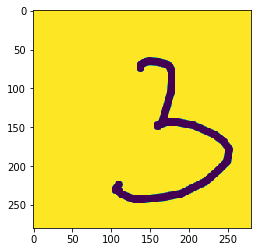

In [3]:
image = Image.open('Untitled.png').convert('RGB').convert('L')
arr = np.array(image)
plt.imshow(arr)

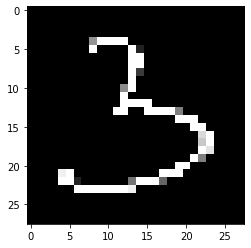

In [4]:
arr = 255-arr
while np.sum(arr[0])==0:
    arr = arr[1:]
while np.sum(arr[:,0])==0:
    arr = arr[:,1:]
while np.sum(arr[-1])==0:
    arr = arr[:-1]
while np.sum(arr[:,-1])==0:
    arr = arr[:,:-1]

image = Image.fromarray(arr)
image = image.resize((20,20))
arr = np.array(image)
arr = np.lib.pad(arr,pad_width=4,mode='constant')
plt.imshow(arr, cmap='gray')

In [5]:
arr = arr.reshape(1,28,28,1)
print("Number is : ",np.argmax(sess.run(prediction,{x:arr})))

Number is :  3
